In [ ]:
import hypernetx as hnx
from hypernetx.utils.toys.lesmis import LesMis
from hnxwidget import HypernetxWidget
import matplotlib.pyplot as plt

scenes = {
    0: ("FN", "TH"),
    1: ("TH", "JV"),
    2: ("BM", "FN", "JA"),
    3: ("JV", "JU", "CH", "BM"),
    4: ("JU", "CH", "BR", "CN", "CC", "JV", "BM"),
    5: ("TH", "GP"),
    6: ("GP", "MP"),
    7: ("MA", "GP"),
}
H = hnx.Hypergraph(scenes)
dnames = LesMis().dnames
dnames

c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.g

,FullName,Description
Symbol,,
AZ,Anzelma,daughter of TH and TM
BA,Bahorel,`Friends of the ABC' cutup
BB,Babet,tooth-pulling bandit of Paris
BJ,Brujon,notorious criminal
BL,Blacheville,Parisian student from Montauban
...,...,...
TS,Toussaint,servant of JV at Rue Plumet
VI,Madame Victurnien,snoop in M-- sur M--
XA,Child 1,son of TH sold to MN


In [ ]:
from hnxwidget import HypernetxWidget
import matplotlib.pyplot as plt

## Default behavior
example1 = HypernetxWidget(H)
example1

c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'FN'}, {'uid': 'BR'}, {'uid': 'BM'}, {'u…

c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\rdflib\plugins\parsers\jsonld.py:167: DeprecationWarning: ConjunctiveGraph is deprecated, use Dataset instead.
  conj_sink = ConjunctiveGraph(store=sink.store, identifier=sink.identifier)
c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\entityset.py:618: Futur

=== Hyperedges in the Ontology Hypergraph ===
Hyperedge: http://xmlns.com/foaf/0.1/account connects Nodes: {rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Agent'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/OnlineAccount')}
Hyperedge: http://xmlns.com/foaf/0.1/accountName connects Nodes: {rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Literal'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/OnlineAccount')}
Hyperedge: http://xmlns.com/foaf/0.1/accountServiceHomepage connects Nodes: {rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Document'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/OnlineAccount')}
Hyperedge: http://xmlns.com/foaf/0.1/age connects Nodes: {rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Agent'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Literal')}
Hyperedge: http://xmlns.com/foaf/0.1/aimChatID connects Nodes: {rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Agent'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Literal')}
Hyperedge: 

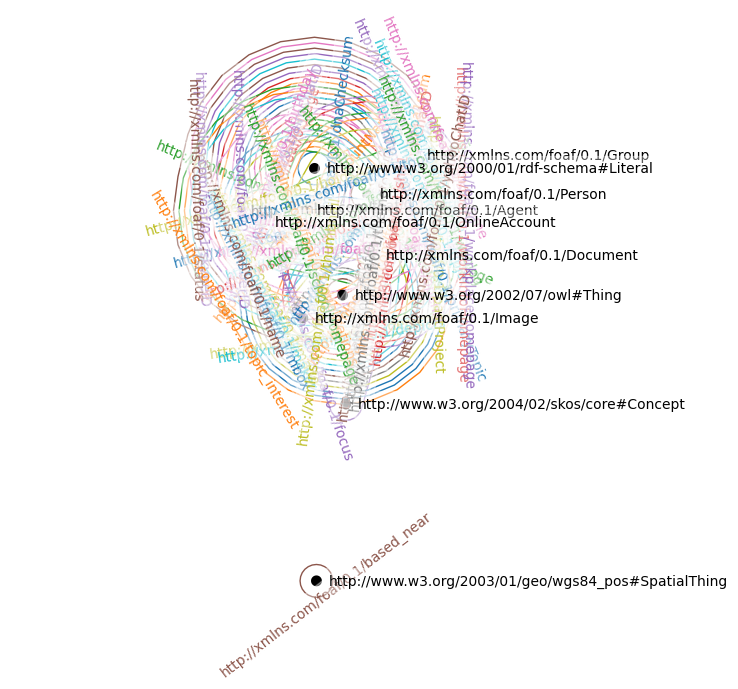

In [ ]:
from rdflib import Graph, RDF, RDFS, OWL
import hypernetx as hnx

# Load FOAF ontology
ontology_url = "http://xmlns.com/foaf/0.1/"
g = Graph()
g.parse(ontology_url)

# Extract properties, domains, and ranges
hyperedges = {}
for prop in g.subjects(RDF.type, RDF.Property):
    domains = set(g.objects(prop, RDFS.domain))
    ranges = set(g.objects(prop, RDFS.range))
    if domains or ranges:
        # Use property as the key, connect domain and range nodes
        hyperedges[prop] = set(domains).union(ranges)

# Create the hypergraph
H = hnx.Hypergraph(hyperedges)

# Visualize the hypergraph
hnx.draw(H)

# Optionally, print hyperedges
print("=== Hyperedges in the Ontology Hypergraph ===")
for edge, nodes in hyperedges.items():
    print(f"Hyperedge: {edge} connects Nodes: {nodes}")

In [9]:
from rdflib import Graph, RDF, RDFS, OWL
import hypernetx as hnx

# Load FOAF ontology
ontology_url = "http://xmlns.com/foaf/0.1/"
g = Graph()
g.parse(ontology_url)

# Extract the first 10 properties, domains, and ranges
hyperedges = {}
counter = 0
for prop in g.subjects(RDF.type, RDF.Property):
    if counter >= 2:  # Limit to the first 10
        break
    domains = set(g.objects(prop, RDFS.domain))
    ranges = set(g.objects(prop, RDFS.range))
    if domains or ranges:
        # Use property as the key, connect domain and range nodes
        hyperedges[prop] = set(domains).union(ranges)
        counter += 1

# Create the hypergraph
H = hnx.Hypergraph(hyperedges)

# Optionally, print hyperedges
print("=== First 10 Hyperedges in the Ontology Hypergraph ===")
for edge, nodes in hyperedges.items():
    print(f"Hyperedge: {edge} connects Nodes: {nodes}")


from hnxwidget import HypernetxWidget
import matplotlib.pyplot as plt

example1 = HypernetxWidget(H)
example1

c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\rdflib\plugins\parsers\jsonld.py:167: DeprecationWarning: ConjunctiveGraph is deprecated, use Dataset instead.
  conj_sink = ConjunctiveGraph(store=sink.store, identifier=sink.identifier)
c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\entityset.py:618: Futur

=== First 10 Hyperedges in the Ontology Hypergraph ===
Hyperedge: http://xmlns.com/foaf/0.1/account connects Nodes: {rdflib.term.URIRef('http://xmlns.com/foaf/0.1/OnlineAccount'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Agent')}
Hyperedge: http://xmlns.com/foaf/0.1/accountName connects Nodes: {rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Literal'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/OnlineAccount')}


HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'http://www.w3.org/2000/01/rdf-schema#Li…

In [6]:
from hnxwidget import HypernetxWidget
import matplotlib.pyplot as plt

example1 = HypernetxWidget(H)
example1

c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
c:\Users\bmills\AppData\Local\anaconda3\envs\hypernetx\lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'http://www.w3.org/2003/01/geo/wgs84_pos…

print("h")

In [3]:
pip install ace-tools-open

Note: you may need to restart the kernel to use updated packages.


In [1]:
print("h")

h
